In [24]:
import networkx as nx
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def sparse_to_tuple(sparse_mx):
    if not sp.isspmatrix_coo(sparse_mx):
        sparse_mx = sparse_mx.tocoo()
    coords = np.vstack((sparse_mx.row, sparse_mx.col)).transpose()
    values = sparse_mx.data
    shape = sparse_mx.shape
    return coords, values, shape

In [59]:
def c1c2c3_split(adj, features, size):
    
    adj = adj - sp.dia_matrix((adj.diagonal()[np.newaxis, :], [0]), shape=adj.shape)
    adj.eliminate_zeros()
    
    G_norm = nx.from_scipy_sparse_matrix(adj)
    adj_norm = nx.normalized_laplacian_matrix(G_norm)
    adj_norm = adj_norm - sp.dia_matrix((adj_norm.diagonal()[np.newaxis, :], [0]), shape=adj_norm.shape)
    adj_norm.eliminate_zeros()

    adj_triu = sp.triu(adj)
    adj_triu_norm = sp.triu(adj_norm)
    edge_count = adj_triu.count_nonzero()
    
    assert edge_count == adj.count_nonzero()/2 
    
    matrix_tuples = sparse_to_tuple(adj_triu_norm)
    probs = ((matrix_tuples[1]**2)/sum(matrix_tuples[1]**2))

    idx = list(range(len(probs)))
    random_set = np.random.choice(idx, size=size*6, replace=False, p=probs)
#     random_set = np.random.choice(idx, size=size, replace=False)

    np.random.shuffle(random_set)
    
    val_test_splits = [random_set[i:i + size] for i in range(0, len(random_set), size)]
    val_test_edges = [matrix_tuples[0][i] for i in val_test_splits]
    
    return val_test_edges
    
#     all_edge_idx = list(range(edges.shape[0]))
#     np.random.shuffle(all_edge_idx)
#     val_edge_idx = all_edge_idx[:num_val]
#     test_edge_idx = all_edge_idx[num_val:(num_val + num_test)]
#     test_edges = edges[test_edge_idx]
#     val_edges = edges[val_edge_idx]
#     train_edges = np.delete(edges, np.hstack([test_edge_idx, val_edge_idx]), axis=0)

In [60]:
G = nx.read_edgelist('../Data/Interactome/huri_apid_merge_ppis_edgelist.csv')

adj = nx.adjacency_matrix(G)
adj_orig = adj - sp.dia_matrix((adj.diagonal()[np.newaxis, :], [0]), shape=adj.shape)
adj_orig.eliminate_zeros()

chosen_nodes = c1c2c3_split(adj_orig, 0, 2000)

Text(0, 0.5, 'Frequency')

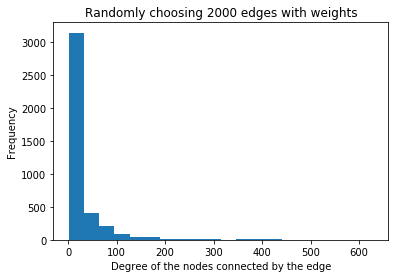

In [61]:
plt.hist([G.degree(x) for x in np.array(list(G.nodes()))[chosen_nodes[0].flatten()]], bins=20)
plt.title('Randomly choosing 2000 edges with weights')
plt.xlabel('Degree of the nodes connected by the edge')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

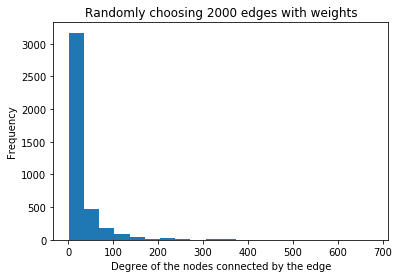

In [62]:
plt.hist([G.degree(x) for x in np.array(list(G.nodes()))[chosen_nodes[1].flatten()]], bins=20)
plt.title('Randomly choosing 2000 edges with weights')
plt.xlabel('Degree of the nodes connected by the edge')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

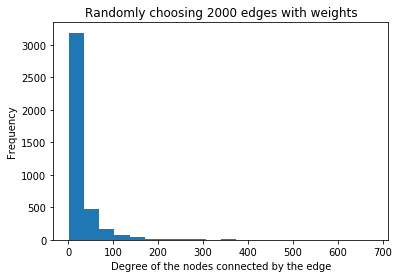

In [63]:
plt.hist([G.degree(x) for x in np.array(list(G.nodes()))[chosen_nodes[2].flatten()]], bins=20)
plt.title('Randomly choosing 2000 edges with weights')
plt.xlabel('Degree of the nodes connected by the edge')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

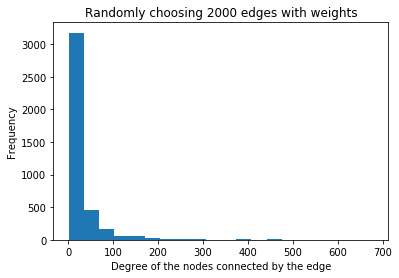

In [64]:
plt.hist([G.degree(x) for x in np.array(list(G.nodes()))[chosen_nodes[3].flatten()]], bins=20)
plt.title('Randomly choosing 2000 edges with weights')
plt.xlabel('Degree of the nodes connected by the edge')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

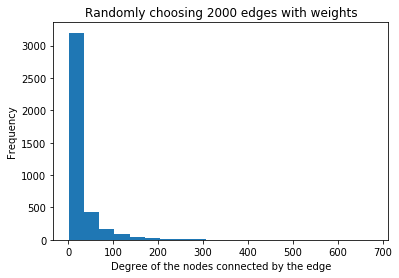

In [65]:
plt.hist([G.degree(x) for x in np.array(list(G.nodes()))[chosen_nodes[4].flatten()]], bins=20)
plt.title('Randomly choosing 2000 edges with weights')
plt.xlabel('Degree of the nodes connected by the edge')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

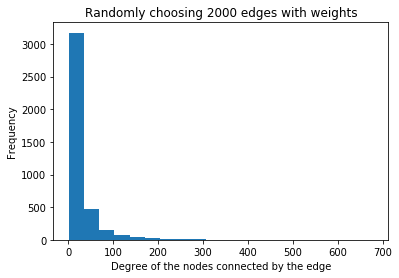

In [66]:
plt.hist([G.degree(x) for x in np.array(list(G.nodes()))[chosen_nodes[5].flatten()]], bins=20)
plt.title('Randomly choosing 2000 edges with weights')
plt.xlabel('Degree of the nodes connected by the edge')
plt.ylabel('Frequency')

In [ ]:
G = nx.read_edgelist('../Data/Interactome/huri_apid_merge_ppis_edgelist.csv')

adj = nx.adjacency_matrix(G)
adj_orig = adj - sp.dia_matrix((adj.diagonal()[np.newaxis, :], [0]), shape=adj.shape)
adj_orig.eliminate_zeros()

adj_triu_orig = sp.triu(adj_orig)
adj_triu_orig_norm = sp.triu(adj_orig_norm)

In [ ]:
matrix_tuples = sparse_to_tuple(adj_triu_orig_norm)
probs = ((matrix_tuples[1]**2)/sum(matrix_tuples[1]**2))

idx = list(range(len(probs)))
random_set = np.random.choice(idx, size=2000, replace=False, p=probs)
chosen_nodes = matrix_tuples[0][random_set].flatten()
plt.hist([G.degree(x) for x in np.array(list(G.nodes()))[chosen_nodes]], bins=20)
plt.title('Randomly choosing 2000 edges with weights^2')
plt.xlabel('Degree of the nodes connected by the edge')
plt.ylabel('Frequency')

NameError: name 'adj_orig' is not defined